# Binary classification: Denoiser network

This program trains and tests a deep learning model to 

1) identify noise (undesired signals) from a database of mouse lemur vocalizations (Binary classification, Supervised learning model). 

The model can help cleaning up the data (e.g., to store only signals of interest into a new dataframe) 


### Created by Daniel Romero Mujalli, Sep2020

email: danielrm84@gmail.com

last update: 5_Jan_2021

# Step 1: The denoiser network

## Importing libraries

In [1]:
# Libraries or modules
import pandas as pd # to work with data frames as in R
import numpy as np  # to handle vectors and arrays
import matplotlib.pyplot as plt # plotting methods
import tensorflow as tf
# verify instalattion
print(tf.__version__)

2.4.0


## Preparing data

In [2]:
# read csv data
df = pd.read_csv("denoiser_classifier.csv", sep = ";")
df.head()

,ID,Label,Accepted,Score,Begin Time (s),End Time (s),Call Length (s),Principal Frequency (kHz),Low Freq (kHz),High Freq (kHz),Delta Freq (kHz),Frequency Standard Deviation (kHz),Slope (kHz/s),Sinuosity,Mean Power (dB/Hz),Tonality
0,1,Noise,FALSCH,0.532043,9.225726,9.227326,0.0016,23.455869,20.418819,24.533532,4.114713,1.689794,2571.695761,1.017303,-102.525308,0.314991
1,2,Noise,FALSCH,0.641606,16.904740,16.909540,0.0048,11.712905,9.548710,13.877100,4.328390,2.198881,986.280311,1.021136,-102.582367,0.255807
2,3,Noise,FALSCH,0.698515,34.464584,34.482584,0.0180,9.686721,9.685695,11.557043,1.871347,0.763553,108.039794,1.000837,-97.568106,0.277682
3,4,Noise,FALSCH,0.718251,61.828949,61.869749,0.0408,9.676309,8.020372,10.371762,2.351390,0.706094,20.610717,1.177019,-95.448584,0.331545
4,5,Noise,FALSCH,0.887077,66.783564,66.787164,0.0036,13.386859,10.124730,15.575264,5.450534,2.245009,-1405.402771,2.006487,-98.860148,0.287909


In [3]:
# from the table header we can see that we dont need all columns for the analysis

# create feature data x and label or target data y

# extract features
# warning: in python the first element has the index 0
x = df.iloc[:,6:]
x.head()


,Call Length (s),Principal Frequency (kHz),Low Freq (kHz),High Freq (kHz),Delta Freq (kHz),Frequency Standard Deviation (kHz),Slope (kHz/s),Sinuosity,Mean Power (dB/Hz),Tonality
0,0.0016,23.455869,20.418819,24.533532,4.114713,1.689794,2571.695761,1.017303,-102.525308,0.314991
1,0.0048,11.712905,9.548710,13.877100,4.328390,2.198881,986.280311,1.021136,-102.582367,0.255807
2,0.0180,9.686721,9.685695,11.557043,1.871347,0.763553,108.039794,1.000837,-97.568106,0.277682
3,0.0408,9.676309,8.020372,10.371762,2.351390,0.706094,20.610717,1.177019,-95.448584,0.331545
4,0.0036,13.386859,10.124730,15.575264,5.450534,2.245009,-1405.402771,2.006487,-98.860148,0.287909


In [4]:
# check the shape of the data
x.shape

(1917, 10)

In [5]:
# feature scaling
# pick only one, either normalization or standardization

# 1) normalization (z-score)
x_norm = (x - x.mean()) / x.std() # axis = 0, per column; axis = 1, per row
x_norm.head()

#x_norm = preprocessing.normalize(x) # use sklearn
#print(x_norm)

,Call Length (s),Principal Frequency (kHz),Low Freq (kHz),High Freq (kHz),Delta Freq (kHz),Frequency Standard Deviation (kHz),Slope (kHz/s),Sinuosity,Mean Power (dB/Hz),Tonality
0,-0.603100,1.905716,2.302116,0.939254,-0.579314,-0.155926,4.028033,-0.638667,-1.292275,-1.194516
1,-0.568851,-0.363293,0.016623,-0.488160,-0.547873,0.155361,1.552081,-0.634040,-1.295348,-1.466004
2,-0.427576,-0.754798,0.045424,-0.798929,-0.909406,-0.722287,0.180527,-0.658546,-1.025337,-1.365655
3,-0.183555,-0.756810,-0.304718,-0.957696,-0.838772,-0.757421,0.043988,-0.445852,-0.911204,-1.118580
4,-0.581695,-0.039847,0.137734,-0.260694,-0.382759,0.183567,-2.183026,0.555513,-1.094912,-1.318742


In [6]:
# 2) standardization
x_stdard = (x - x.min()) / (x.max() - x.min())

x_stdard.head()

,Call Length (s),Principal Frequency (kHz),Low Freq (kHz),High Freq (kHz),Delta Freq (kHz),Frequency Standard Deviation (kHz),Slope (kHz/s),Sinuosity,Mean Power (dB/Hz),Tonality
0,0.000000,0.455722,0.435511,0.389870,0.082588,0.104014,0.686534,0.001091,0.149730,0.189265
1,0.002217,0.169376,0.173181,0.176709,0.086876,0.135351,0.611038,0.001332,0.149048,0.108153
2,0.011362,0.119968,0.176487,0.130301,0.037560,0.047000,0.569216,0.000053,0.208950,0.138134
3,0.027158,0.119714,0.136298,0.106592,0.047195,0.043463,0.565053,0.011157,0.234271,0.211952
4,0.001386,0.210194,0.187082,0.210677,0.109399,0.138190,0.497147,0.063434,0.193515,0.152150


In [6]:
# extract labels or target
# deep copy of df to prevent modifying the original data
y = df[["Label"]].copy(deep = True)
y.head()

#y.value_counts()


,Label
0,Noise
1,Noise
2,Noise
3,Noise
4,Noise


In [7]:
# check the value counts of the target or label df
print(y.iloc[:,0].value_counts())

USV            1303
Noise           598
Longwhistle      16
Name: Label, dtype: int64


In [8]:
# encode class values as integers
# there is an encoder from sklearn.preprocessing

#print(y.iloc[:,0]) # access individual values using iloc property of pandas object
#print(y.shape[0]) # shape returns a list, so I need to call its output using []

# we do hard way
y.loc[y["Label"] == "Noise", "Label"] = 0 # try this new thing
y.loc[y["Label"] != 0, "Label"] = 1 # 0, because the word "Noise" no longer exist in y

# check value counts to verify that label encoding went right
print(y.iloc[:,0].value_counts())

1    1319
0     598
Name: Label, dtype: int64


## Building the denoiser model 

In [9]:
# get the features (inputs) and labels (target)
features = x_norm
labels   = y

print(features.shape)

(1917, 10)


In [10]:
# set model parameters
input_shape = (features.shape[1],) # as tuple
print(input_shape)
hidden_nodes_1 = 8
hidden_nodes_2 = 5
hidden_activation_1 = "sigmoid"
hidden_activation_2 = "sigmoid"
output_activation = "sigmoid"
loss_function     = "binary_crossentropy" # classification problem (not regression)
optimizer_used    = "rmsprop"# Root Mean Square Propagation #"SGD" # stochastic gradient descent
num_epochs        = 200

(10,)


In [11]:
# to have a balance data, i.e., the same proportion of classes in both, train and test data
# we import the class StratifiedShuffleSplit from sklearn.model_selection
# here I follow the recommendatio by Nelson (Instructor DL physalia course)
# import, declare, use:
from sklearn.model_selection import StratifiedShuffleSplit

# Build a Stratified... object "sss" with 20% of the data assign to validation (i.e., test)
sss = StratifiedShuffleSplit(n_splits = 1, 
                             test_size = 0.2, 
                             random_state = 0)
# The split method in sss object (Stratified..) returns two lists (iterable) that can be used to index
# the samples that go into train and validation or test sets
for train_index, test_index in sss.split(features, labels):
    features_train = features.iloc[train_index, :] # features data selected for training
    features_test  = features.iloc[test_index, :]  # features data selected for test by constructor above
    labels_train   = labels.iloc[train_index, :]   # labels selected for training
    labels_test    = labels.iloc[test_index, :]    # labels for selected for testing

# let's print some shapes to get an idea of the structure of the train/test data
print("Training features shape: ", features_train.shape)
print("Training_labels shape: ", labels_train.shape)
print("Test features shape: ", features_test.shape)
print("Test labels shape: ", labels_test.shape)
    

Training features shape:  (1533, 10)
Training_labels shape:  (1533, 1)
Test features shape:  (384, 10)
Test labels shape:  (384, 1)


In [14]:
# Building the neural network model
# we use a sequential method, building and adding each layer into the model
# here we use keras
#from keras.models import Sequential (OLD, deprecated)
from tensorflow.keras.models import Sequential

# we use a dense (i.e., fully connected) ANN
from tensorflow.keras.layers import Dense

#building the model for binary classification (0, 1; yes/no)
# the aim is to build a denoiser: binary classification problem
model = Sequential()
# hidden layer 1
model.add(Dense(units = hidden_nodes_1 
               ,input_shape = input_shape
               ,activation = hidden_activation_1))
# hidden layer 2 (no longer needs specification of shape)
model.add(Dense(units = hidden_nodes_2 
               ,activation = hidden_activation_2))
# output layer
model.add(Dense(units = 1
               ,activation = output_activation))


In [15]:
# The model is declared, but we still need to compile it to actually
# build all the data structure
# here we can specify additional metrics (default, loss)
model.compile(optimizer = optimizer_used
             ,loss = loss_function)

In [16]:
# we print the summary to get an idea of the structure and parameters to be trained
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 8)                 88        
_________________________________________________________________
dense_1 (Dense)              (None, 5)                 45        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 6         
Total params: 139
Trainable params: 139
Non-trainable params: 0
_________________________________________________________________
None


## Train and test the model 

In [17]:
# fit the model and store history
history = model.fit(x = features_train
                   ,y = labels_train
                   ,epochs = num_epochs
                   ,validation_data = (features_test, labels_test)
                   ,verbose = 1) # 0, silent; 1, training process; 2, epochs only

Epoch 1/200
48/48 [==============================] - 5s 9ms/step - loss: 1.1666 - val_loss: 1.0178
Epoch 2/200
48/48 [==============================] - 0s 3ms/step - loss: 0.9665 - val_loss: 0.8983
Epoch 3/200
48/48 [==============================] - 0s 3ms/step - loss: 0.8818 - val_loss: 0.8054
Epoch 4/200
48/48 [==============================] - 0s 3ms/step - loss: 0.7901 - val_loss: 0.7335
Epoch 5/200
48/48 [==============================] - 0s 3ms/step - loss: 0.7206 - val_loss: 0.6799
Epoch 6/200
48/48 [==============================] - 0s 3ms/step - loss: 0.6694 - val_loss: 0.6406
Epoch 7/200
48/48 [==============================] - 0s 3ms/step - loss: 0.6379 - val_loss: 0.6122
Epoch 8/200
48/48 [==============================] - 0s 3ms/step - loss: 0.6079 - val_loss: 0.5899
Epoch 9/200
48/48 [==============================] - 0s 3ms/step - loss: 0.5822 - val_loss: 0.5697
Epoch 10/200
48/48 [==============================] - 0s 3ms/step - loss: 0.5714 - val_loss: 0.5493
Epoch 11/

48/48 [==============================] - 0s 3ms/step - loss: 0.2015 - val_loss: 0.1316
Epoch 84/200
48/48 [==============================] - 0s 3ms/step - loss: 0.2041 - val_loss: 0.1310
Epoch 85/200
48/48 [==============================] - 0s 3ms/step - loss: 0.1762 - val_loss: 0.1306
Epoch 86/200
48/48 [==============================] - 0s 3ms/step - loss: 0.1738 - val_loss: 0.1298
Epoch 87/200
48/48 [==============================] - 0s 3ms/step - loss: 0.1656 - val_loss: 0.1293
Epoch 88/200
48/48 [==============================] - 0s 3ms/step - loss: 0.1617 - val_loss: 0.1299
Epoch 89/200
48/48 [==============================] - 0s 3ms/step - loss: 0.1841 - val_loss: 0.1306
Epoch 90/200
48/48 [==============================] - 0s 3ms/step - loss: 0.1725 - val_loss: 0.1299
Epoch 91/200
48/48 [==============================] - 0s 3ms/step - loss: 0.1859 - val_loss: 0.1293
Epoch 92/200
48/48 [==============================] - 0s 3ms/step - loss: 0.1745 - val_loss: 0.1291
Epoch 93/200


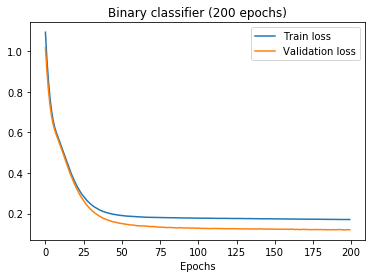

In [18]:
def plot_loss_history(h, title):
    plt.plot(h.history['loss'], label = "Train loss")
    plt.plot(h.history['val_loss'], label = "Validation loss")
    plt.xlabel('Epochs')
    plt.title(title)
    plt.legend()
    plt.show()

plot_loss_history(history, 'Binary classifier ({} epochs)'.format(num_epochs))

In [19]:
# confusion matrix
# taking advange of sklearn.metrics
from sklearn.metrics import confusion_matrix

predictions = model.predict(features_test)
predicted_labels = np.where(predictions > 0.5, "NOISE", "CALL")
target_labels = labels_test.to_numpy().reshape((len(labels_test), 1))
target_labels = np.where(target_labels > 0.5, "NOISE", "CALL")

con_mat_df = confusion_matrix(target_labels, predicted_labels, labels = ["CALL", "NOISE"])
print(con_mat_df)

[[113   7]
 [ 11 253]]


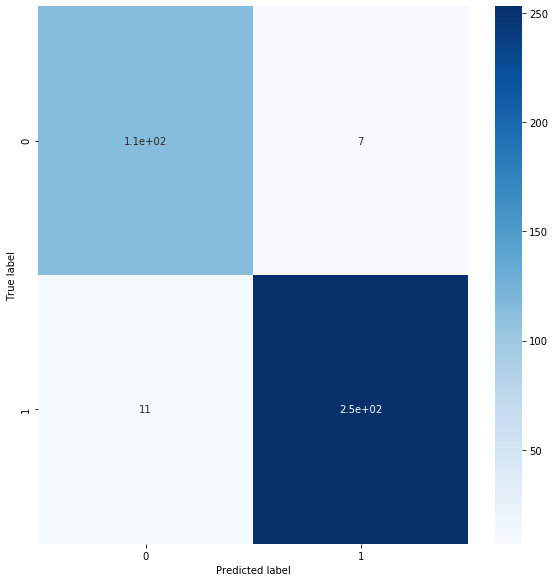

In [21]:
import seaborn as sn

figure = plt.figure(figsize=(8, 8))
sn.heatmap(con_mat_df, annot=True,cmap=plt.cm.Blues)
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [23]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(target_labels, predicted_labels)
tn, fp, fn, tp = con_mat_df.ravel()
tpr = tp/(tp+fn)
tr = tp/(tp+fn)

print("Overall accuracy is: ", accuracy)
print("Precision: ", tpr)
print("Recall: ", tr)

Overall accuracy is:  0.953125
Precision:  0.9583333333333334
Recall:  0.9583333333333334
